### Problem Statement
For this project you must create a data set by simulating a real-world phenomenon of your choosing.  You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life.  

Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose.  Specifically, in this project you should:

(i)   Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

(ii)  Investigate  the  types  of  variables  involved,  their  likely  distributions,  and  their relationships with each other.

(iii) Synthesise/simulate a data set as closely matching their properties as possible.

(iv)  Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be     displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set.  Some students may already have some real-world data sets in their own files.  It is okay to base your synthesised data set on these should you wish (please reference it if you do),but the main task in this project is to create a synthesised data set.  

### Example Project Idea - A Real-world phenomenon of the performance of students studying a ten-credit module. 

After some research, I decide that the most interesting variable related to this is the mark a student receives in the module - this is going to be one of my variables (grade).

Upon investigation of the problem, I find that the number of hours on average a student studies per week (hours), the number of times they log onto Moodle in the first three weeks of term (logins), and their previous level of degree qualification (qual) are closely related to grade. The hours and grade variables will be non-negative real number with two decimal places,logins will be a non-zero integer and qual will be acategorical variable with four possible values: none, bachelors, masters, or phd.

After some online research, I find that full-time post-graduate students study on average four hours per week with a standard deviation of a quarter of an hour and that a normal distribution is an acceptable model of such a variable. Likewise, I investigate the other four variables, and I also look at the relationships between the variables. 

I devise an algorithm (or method) to generate such a data set, simulating values of the four variables for two-hundred students. I detail all this work in my notebook, and then I add some code in to generate a data set with those properties

### Project Outline:

#### Project Idea: Explore the factors influencing length of stay of dogs in a small animal shelter

#### Variables:

(i)    Stay: Length of stay in days - (Non-zero integer)

(ii)   Age:  Age on admission - (Non-zero integer)

(iii)  Gender: (A categorical variable with two possible values: Male, Female)

(iv)    Coat Colour - (A categorical variable with three possible values: Grey/white/gold , brown , black)

(v)   Neuter Status: (A categorical variable with two possible values: Neutered, Intact)

(vi)   Size: Size of the breed - (A categorical variable with four possible values: small, medium, large, x-large)

#### Sample Size: 200
***
 

### Import Modules:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

### Set up the Data Set:

In [2]:
#Create a new Dataframe for the data

#Use 3 decimal places in output display
pd.set_option("display.precision", 3)

#Create the headers for the data
df = pd.DataFrame() 

### Import Austin Data Set:

In [3]:
# Read the data file.
#df1 = pd.read_csv('https://query.data.world/s/4dhuacn0l3k8nw0f5strehu96',names = None , index_col = 0,header = 0)

In [4]:
#df1.describe()

### Relationship between Variables:

Gender: Male are adopted faster (20 days on average) than their female counterparts (22 days).

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Project+Report.pdf

Coat colour made no difference to length of stay. 

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

Black dogs did not take longer to be adopted. Brindle dogs and multi-colour dogs took longer 

Age: Puppies, the lapdogs were adopted soonest, with an average stay of just 13 days.

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

The average time in custody for dogs over the age of 7 was M = 89 days, SD = 89 days with length of stay that had a range of 1–367 days in custody for dogs. The average length of stay of the general population is M = 51 days, SD = 64.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/



### Simulating Key Variables:

### Length of Stay:
***

#### Research:

Median time for adoptions - 28 days (UK)

https://www.researchgate.net/publication/244642863_Factors_affecting_time_to_adoption_of_dogs_re-homed_by_a_charity_in_the_UK

https://veterinaryrecord.bmj.com/content/161/9/283.2

Length of stay increased with age and was highest for medium-sized dogs and those considered to be in the guard breed. Length of stay was not found to be influenced by sex or coat color, and surprisingly dogs considered to be part of a “fighting” breed had a shorter length of stay than other breeds.

The average length of stay during this period was 35 days. Puppies were adopted fastest, with a stay of 23 days for puppies under six months and 33 days for the older puppies. Adult dogs had an average wait of 42 days before they were adopted.

https://faunalytics.org/effects-of-phenotypic-characteristics-on-the-length-of-stay-of-dogs-at-two-no-kill-animal-shelters-2/

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html


#### Assumptions:

#### Simulating the Dataset:

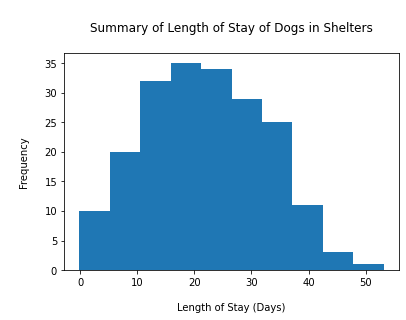

In [5]:
#Trial np.normal
LOS1 =  np.random.normal(loc=22, scale=10, size=200)
plt.hist(LOS1)
plt.title("\nSummary of Length of Stay of Dogs in Shelters\n")
plt.xlabel("\nLength of Stay (Days)")
plt.ylabel("\nFrequency\n")
plt.show()
#I determined thatnp.random.normal did not reflect the breadth of values required so I opted for np.random.triangular()

In [6]:
#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.triangular() to create an array between 1 day and 365 days (1 year) skewed around 22 days
LOS2 = (np.random.triangular (1, 22, 365, size=200))

#Populate the 'Size' column with 200 samples aged 1 month to 13 years.
df['Length of Stay (Days)'] = LOS2
       
#Show the dataset 
print(df['Length of Stay (Days)'])


0      127.657
1      176.429
2      142.299
3      126.626
4       96.750
        ...   
195    112.775
196     54.422
197     59.885
198     22.061
199     99.267
Name: Length of Stay (Days), Length: 200, dtype: float64


#### Plot the Result:

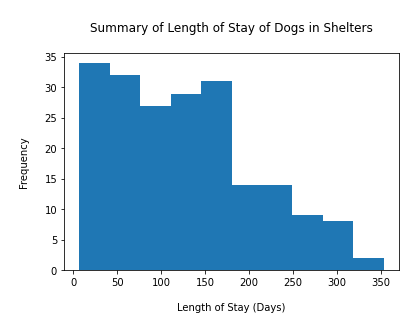

In [7]:
plt.hist(LOS2)
plt.title("\nSummary of Length of Stay of Dogs in Shelters\n")
plt.xlabel("\nLength of Stay (Days)")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

### Age:
***


#### Research:

47.7% of dogs surrendered were aged between 5 months and 3 years

https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

Puppy (0-1 years) 26%; Adult (1-3 years) 66%; Adult (4-7 years)  Senior (7+) 9%

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

#### Assumptions - Expected Distribution:

< 1 year     26%
1 year       22%
2 years      19%
3 years      10%
4 years       6%
5 years       5%
6 years       3%
7-9 years +   5%
10  years +   4%

Based on Austin Dataset

#### Simulating the Dataset:

In [8]:
# Simulating Age

#Set seed to zero to produce a consistent result
np.random.seed(0)

# Use 3 decimal places in output display
pd.set_option("display.precision", 0)

#Use random.triangular() to create an array between 1 month and 156 months (13 years) skewed around 6 months
Age = (np.random.triangular (1, 6, 156, size=200))

#Populate the 'Age' column with 200 samples aged 1 month to 13 years.
df['Age (Mths)'] = Age
       
#Show the dataset 
print(df['Age (Mths)'])

0      54
1      75
2      60
3      53
4      40
       ..
195    47
196    22
197    24
198     8
199    41
Name: Age (Mths), Length: 200, dtype: float64


#### Plot the Result:

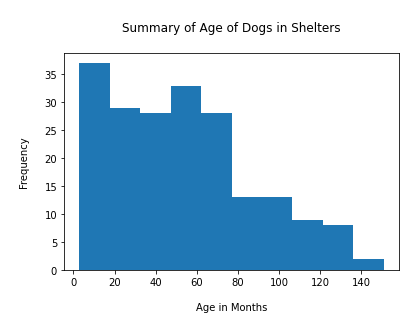

In [9]:
plt.hist(Age)
plt.title("\nSummary of Age of Dogs in Shelters\n")
plt.xlabel("\nAge in Months")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

### Gender:
***

#### Research:

Gender is simulated by numpy.random.choice() between 'Male' and 'Female' with assumed probability of 0.33 male and 0.67 female.  This probability is based on 36,000 dogs in the 'Austin animal shelter dataset' 

https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Austin_Animal_Center_Intakes.csv

This result was supported by a UK study of 16,000 shelter dogs which found that females were more likely to be adopted.

https://www.companionanimalpsychology.com/2015/11/large-study-finds-no-evidence-for-black.html

Close to equal numbers of male and female dogs were surrendered. 

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

#### Assumptions:

Male   - 54%
Female - 46%

Based on Austin Dataset.

#### Simulating the Dataset

In [10]:
#Create the Male/ Female object
sex = ['Male','Female']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 54%:46% male:female ratio & populate the 'Gender' column with male & female samples
Gender = np.random.choice(sex, size = 200, replace = True, p = [0.54,0.46])

#Populate the 'Gender' column with 200 samples.
df['Gender'] = Gender

# Show the dataset 
print(df['Gender'])

0      Female
1      Female
2      Female
3      Female
4        Male
        ...  
195      Male
196      Male
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object


#### Plot the Result:

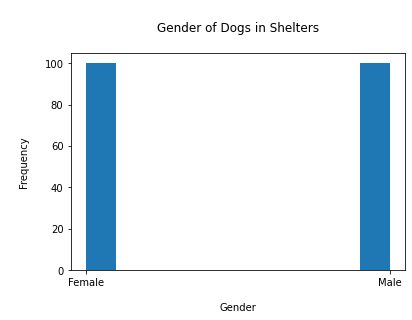

In [11]:
plt.hist (Gender)
plt.title("\nGender of Dogs in Shelters\n")
plt.xlabel("\nGender")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

### Coat Colour:
***

#### Research:

'Black dog syndrome' has been debated a great deal and remains inconclusive.

#https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

The rehoming rate for black and non-black dogs was identical, at 88.5%.

#https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

Black dogs did not take longer to be adopted at either of the two shelters taking part in this study. In fact, brindle dogs had a longer wait at both shelters, and multi-colour dogs also took longer at one of the shelters. Black dogs were not more likely to be euthanized. Age and breed group were more important than coat colour when it came to adoptability.

#### Assumptions:

White/Grey/Gold     - 30%
Black               - 30%
Brown/Multi- Colour - 40%

#### Simulating the Dataset:

In [12]:
#Create the Male/ Female object
colour = ['White/Grey/Gold','Brown','Black']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 33%:67% male:female ratio & populate the 'Gender' column with male & female samples
Colour = np.random.choice(colour, size = 200, replace = True, p = [0.3,0.4,.3])

#Populate the 'Colour' column with 200 samples.
df['Coat Colour'] = Colour

# Show the dataset 
print(df['Coat Colour'])

0                Brown
1                Black
2                Brown
3                Brown
4                Brown
            ...       
195              Brown
196    White/Grey/Gold
197    White/Grey/Gold
198    White/Grey/Gold
199              Brown
Name: Coat Colour, Length: 200, dtype: object


#### Plot the Result:

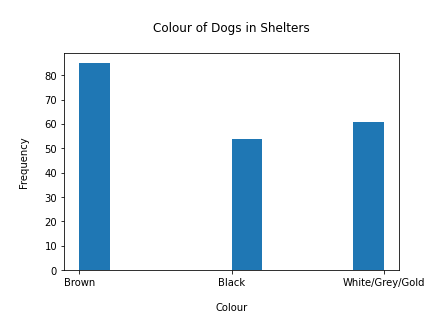

In [13]:
plt.hist (Colour)
plt.title("\nColour of Dogs in Shelters\n")
plt.xlabel("\nColour")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

### Neuter Status
***

#### Research:

Approximately half of the pets 53% percent of dogs surrendered were not neutered.

#### Assumptions:

Neutered Male: 26%, Intact Male: 29%; Spayed Female: 21%; Non Spayed: 24%

Source (Austin Dataset)

#### Simulating the Dataset:

In [14]:
#Create the Neutered/Intact Object
Status = ['Neutered Male','Intact Male','Spayed Female','Non Spayed Female']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 26%:29%:21%:24% 
Neuter_Status = np.random.choice(Status, size = 200, replace = True, p = [.26,.29,.21,.24])

#Populate the 'Neuter Status' column with Neutered/Non Neutered samples
df['Neuter Status'] = Neuter_Status

# Show the dataset 
print(df['Neuter Status'])

0        Intact Male
1      Spayed Female
2      Spayed Female
3        Intact Male
4        Intact Male
           ...      
195      Intact Male
196    Neutered Male
197    Neutered Male
198    Neutered Male
199      Intact Male
Name: Neuter Status, Length: 200, dtype: object


#### Plot the Results:

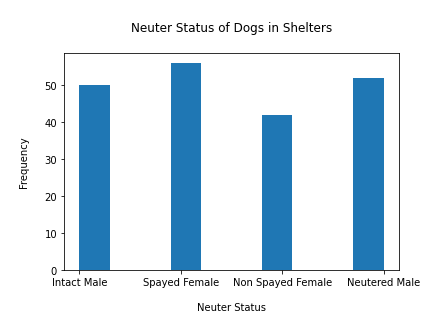

In [15]:
plt.hist (Neuter_Status)
plt.title("\nNeuter Status of Dogs in Shelters\n")
plt.xlabel("\nNeuter Status")
plt.ylabel("\nFrequency\n")
plt.show()

### Size
***

#### Research:

There was an effect of size, with the XS dogs being adopted soonest, followed by the small dogs. The medium-sized dogs were the ones with the longest stay. The authors say that the XL dogs (such as St Bernards) were quite unique and likely were adopted out because of this. Some people may also have had size restrictions imposed by their landlords or condominium councils that meant they could only have a small or extra-small dog.

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

#### Assumptions:
Small 30%; Medium 29%, Large 40%; X-Large 1%

#### Simulating the Dataset:

In [16]:
#Create the Size Object
Status = ['Small','Medium','Large','X-Large']

#Set seed to zero to produce a consistent result
np.random.seed(0)

#Use random.choice () to create an array with a probability of 30%:29%:40%:1% 
Neuter_Status = np.random.choice(Status, size = 200, replace = True, p = [.3,.29,.4,.01])

#Populate the 'Neuter Status' column with Neutered/Non Neutered samples
df['Neuter Status'] = Neuter_Status

# Show the dataset 
print(df['Neuter Status'])

0      Medium
1       Large
2       Large
3      Medium
4      Medium
        ...  
195    Medium
196     Small
197     Small
198     Small
199    Medium
Name: Neuter Status, Length: 200, dtype: object


#### Plot the Results:

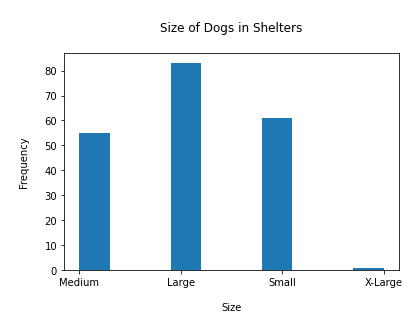

In [17]:
plt.hist (Neuter_Status)
plt.title("\nSize of Dogs in Shelters\n")
plt.xlabel("\nSize")
plt.ylabel("\nFrequency\n")
plt.show()

<BR>

<BR>

### Summary Dataset:
***

In [18]:
print(df)

     Length of Stay (Days)  Age (Mths)  Gender      Coat Colour Neuter Status
0                      128          54  Female            Brown        Medium
1                      176          75  Female            Black         Large
2                      142          60  Female            Brown         Large
3                      127          53  Female            Brown        Medium
4                       97          40    Male            Brown        Medium
..                     ...         ...     ...              ...           ...
195                    113          47    Male            Brown        Medium
196                     54          22    Male  White/Grey/Gold         Small
197                     60          24    Male  White/Grey/Gold         Small
198                     22           8    Male  White/Grey/Gold         Small
199                     99          41    Male            Brown        Medium

[200 rows x 5 columns]


### References:
https://www.aspca.org/animal-homelessness/shelter-intake-and-surrender/pet-statistics

https://www.petfinder.com/pet-adoption/dog-adoption/pets-relinquished-shelters/

https://pubmed.ncbi.nlm.nih.gov/32575574/#&gid=article-figures&pid=figure-2-uid-1

https://www.thejournal.ie/dogs-abandoned-5194543-Sep2020/

https://news.orvis.com/dogs/when-is-it-time-to-surrender-your-dog

https://faunalytics.org/understanding-the-factors-that-lead-to-successful-dog-adoptions/

https://veterinaryrecord.bmj.com/content/161/9/283.2

https://pubmed.ncbi.nlm.nih.gov/29557174/

https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2020/07/21083509/MACH-EndYear2019.pdf

https://apnews.com/article/218042cf3f684525874f48ae990ed49b

https://www.hillspet.com/dog-care/new-pet-parent/common-reasons-adopted-dogs-are-returned-to-shelters

https://data.bloomington.in.gov/dataset/animal-care-and-control/resource/7a847ec2-31c6-48e3-b0bc-02af2fa94587

https://www.companionanimalpsychology.com/2013/03/what-influences-dogs-length-of-stay-at.html

Re-homing stats:
https://data.world/rdowns26/austin-animal-shelter/workspace/file?filename=Project+Report.pdf

Older dog study:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5867524/